In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [38]:
customer_den = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=3)
transaction = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=1)
addr = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=4,skiprows=1)

In [23]:
customer_den.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,69,Executive Secretary,Health,Mass Customer,N,Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16,42,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
2,3,Arlin,Dearle,Male,61,1954-01-20,69,Recruiting Manager,Property,Mass Customer,N,Yes,15
3,9,Mala,Lind,Female,97,1973-03-10,50,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8
4,10,Fiorenze,Birdall,Female,49,1988-10-11,34,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20


In [24]:
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,1999-07-20
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,1998-12-16
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,2015-08-10


In [20]:
addr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [43]:
# Calculate Recency
recency = transaction[["customer_id","transaction_date"]].groupby("customer_id").last().reset_index()
recency.columns = ["customer_id", "recent_transaction_date"]
recency.head()

,customer_id,recent_transaction_date
0,1,2017-03-29
1,2,2017-08-24
2,3,2017-09-19
3,4,2017-06-18
4,5,2017-04-28


In [45]:
# Calculate Monetary
monetary = transaction[["customer_id","profit"]].groupby("customer_id").sum().reset_index()
monetary.columns = ["customer_id", "sum_of_profit"]
monetary.head()

,customer_id,sum_of_profit
0,1,3018.09
1,2,2226.26
2,3,3290.21
3,4,220.57
4,5,2394.94


In [46]:
recency.merge(monetary, on="customer_id")

,customer_id,recent_transaction_date,sum_of_profit
0,1,2017-03-29,3018.090000
1,2,2017-08-24,2226.260000
2,3,2017-09-19,3290.210000
3,4,2017-06-18,220.570000
4,5,2017-04-28,2394.940000
...,...,...,...
3487,3497,2017-09-12,1648.320000
3488,3498,2017-02-10,3147.330000
3489,3499,2017-11-09,4955.250000
3490,3500,2017-03-14,1785.860000


In [47]:
merged_df = customer_den[["customer_id", "gender", "past_3_years_bike_related_purchases", "Age", "job_industry_category", "wealth_segment", "owns_car", "tenure"]].merge(
    addr[["customer_id","state","property_valuation"]], on="customer_id").merge(
    recency.merge(monetary, on="customer_id"))

merged_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,recent_transaction_date,sum_of_profit
0,1,Female,93,69,Health,Mass Customer,Yes,11,NSW,10,2017-03-29,3018.09
1,2,Male,81,42,Financial Services,Mass Customer,Yes,16,NSW,10,2017-08-24,2226.26
2,9,Female,97,50,Argiculture,Affluent Customer,Yes,8,NSW,12,2017-09-30,2353.11
3,12,Male,58,29,Manufacturing,Mass Customer,No,8,QLD,4,2017-09-16,3540.03
4,13,Male,38,68,Financial Services,High Net Worth,Yes,8,VIC,6,2017-04-05,4337.38


In [58]:
merged_df["recency"] = (merged_df["recent_transaction_date"].max() - merged_df["recent_transaction_date"]).dt.days
merged_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,recent_transaction_date,sum_of_profit,recency
0,1,Female,93,69,Health,Mass Customer,Yes,11,NSW,10,2017-03-29,3018.09,276
1,2,Male,81,42,Financial Services,Mass Customer,Yes,16,NSW,10,2017-08-24,2226.26,128
2,9,Female,97,50,Argiculture,Affluent Customer,Yes,8,NSW,12,2017-09-30,2353.11,91
3,12,Male,58,29,Manufacturing,Mass Customer,No,8,QLD,4,2017-09-16,3540.03,105
4,13,Male,38,68,Financial Services,High Net Worth,Yes,8,VIC,6,2017-04-05,4337.38,269


In [74]:
# Define the age groups
bins = [0, 29, 39, 49, 59, float('inf')]
labels = ['<30', '30-40', '40-50', '50-60', '60+']


merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=False)
merged_df = merged_df.reset_index()
merged_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,recent_transaction_date,sum_of_profit,recency,Age_Group
0,1,Female,93,69,Health,Mass Customer,Yes,11,NSW,10,2017-03-29,3018.09,276,60+
1,2,Male,81,42,Financial Services,Mass Customer,Yes,16,NSW,10,2017-08-24,2226.26,128,40-50
2,9,Female,97,50,Argiculture,Affluent Customer,Yes,8,NSW,12,2017-09-30,2353.11,91,50-60
3,12,Male,58,29,Manufacturing,Mass Customer,No,8,QLD,4,2017-09-16,3540.03,105,30-40
4,13,Male,38,68,Financial Services,High Net Worth,Yes,8,VIC,6,2017-04-05,4337.38,269,60+


In [95]:
merged_df = merged_df.iloc[:,2:]
merged_df.head()

,customer_id,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,recent_transaction_date,sum_of_profit,recency,Age_Group
0,1,Female,93,69,Health,Mass Customer,Yes,11,NSW,10,2017-03-29,3018.09,276,60+
1,2,Male,81,42,Financial Services,Mass Customer,Yes,16,NSW,10,2017-08-24,2226.26,128,40-50
2,9,Female,97,50,Argiculture,Affluent Customer,Yes,8,NSW,12,2017-09-30,2353.11,91,50-60
3,12,Male,58,29,Manufacturing,Mass Customer,No,8,QLD,4,2017-09-16,3540.03,105,30-40
4,13,Male,38,68,Financial Services,High Net Worth,Yes,8,VIC,6,2017-04-05,4337.38,269,60+


# Visualisations

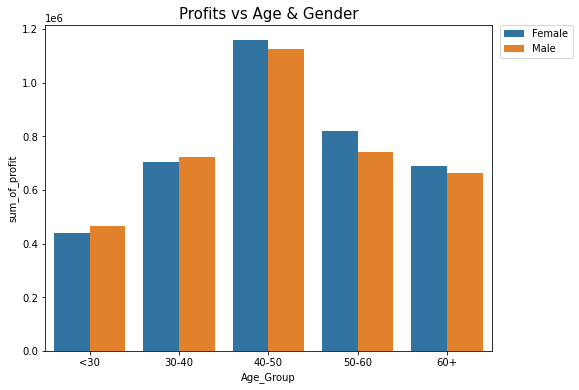

In [167]:
# Profits vs Age & Gender
fig_gender_age_profits = plt.figure(figsize =(8, 6))
sb.barplot(data=merged_df, x='Age_Group', y='sum_of_profit', hue = 'gender', estimator=sum, ci=None).set_title(
    "Profits vs Age & Gender", fontsize = 15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

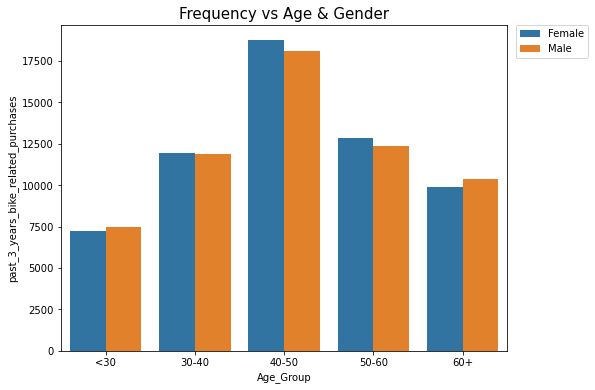

In [175]:
# Frequency vs Age & Gender
fig_gender_age_freq = plt.figure(figsize =(8, 6))
sb.barplot(data=merged_df, x='Age_Group', y='past_3_years_bike_related_purchases', hue = 'gender', estimator=sum, ci=None).set_title(
    "Frequency vs Age & Gender", fontsize = 15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

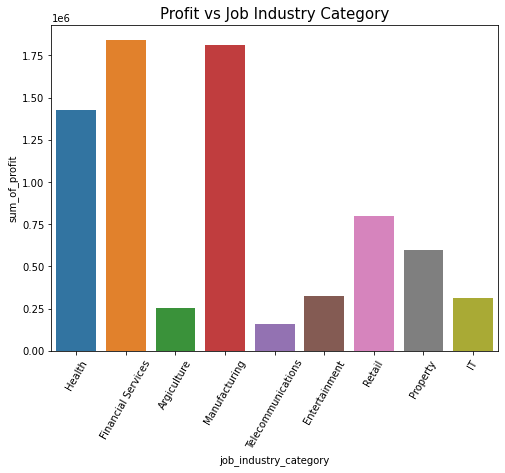

In [170]:
# Profit vs Job Industry Category
fig_job_freq = plt.figure(figsize =(8, 6))
sb.barplot(data=merged_df, x='job_industry_category', y='sum_of_profit', estimator=sum, ci=None).set_title(
    "Profit vs Job Industry Category", fontsize = 15)
plt.xticks(rotation=60)
plt.show()

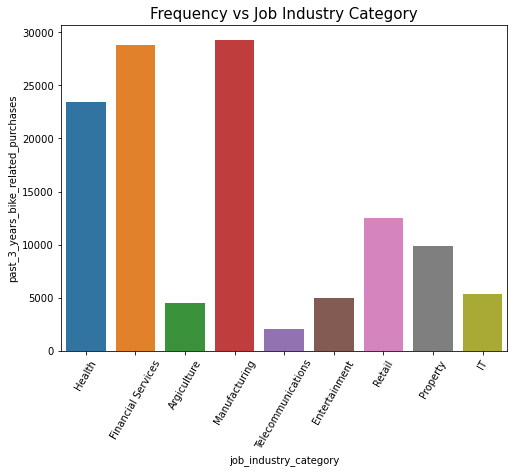

In [166]:
# Frequency vs Job Industry Category
fig_job_freq = plt.figure(figsize =(8, 6))
sb.barplot(data=merged_df, x='job_industry_category', y='past_3_years_bike_related_purchases', estimator=sum, ci=None).set_title(
    "Frequency vs Job Industry Category", fontsize = 15)
plt.xticks(rotation=60)
plt.show()

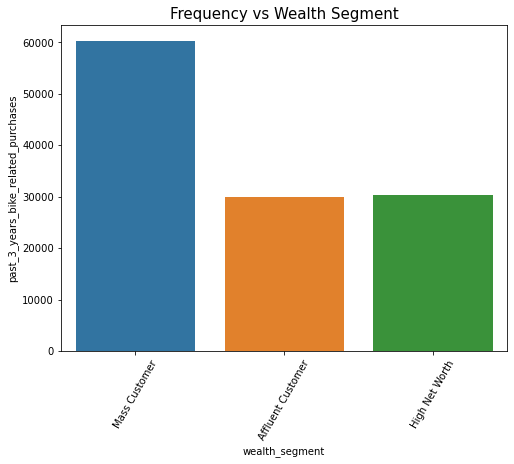

In [174]:
# Frequency vs Wealth Segment
fig_wealthSeg_freq = plt.figure(figsize =(8, 6))
sb.barplot(data=merged_df, x='wealth_segment', y='past_3_years_bike_related_purchases', estimator=sum, ci=None).set_title(
    "Frequency vs Wealth Segment", fontsize = 15)
plt.xticks(rotation=60)
plt.show()

/Users/qinghualiu/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

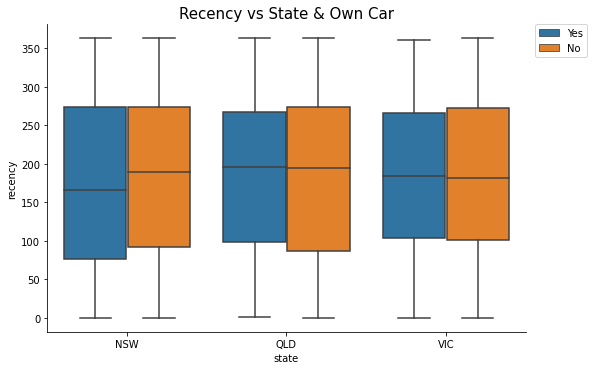

In [173]:
# Recency(Mean) vs Age & Gender
fig_state_car = plt.figure()
sb.catplot(data=merged_df, x='state', y='recency', hue="owns_car", kind='box', legend=False, size=5, aspect=1.5)
plt.title("Recency vs State & Own Car", fontsize = 15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [183]:
merged_df.to_excel("task3.xlsx")

In [184]:
merged_df

,customer_id,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,tenure,state,property_valuation,recent_transaction_date,sum_of_profit,recency,Age_Group
0,1,Female,93,69,Health,Mass Customer,Yes,11,NSW,10,2017-03-29,3018.09,276,60+
1,2,Male,81,42,Financial Services,Mass Customer,Yes,16,NSW,10,2017-08-24,2226.26,128,40-50
2,9,Female,97,50,Argiculture,Affluent Customer,Yes,8,NSW,12,2017-09-30,2353.11,91,50-60
3,12,Male,58,29,Manufacturing,Mass Customer,No,8,QLD,4,2017-09-16,3540.03,105,30-40
4,13,Male,38,68,Financial Services,High Net Worth,Yes,8,VIC,6,2017-04-05,4337.38,269,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,3493,Male,30,59,Health,High Net Worth,No,18,NSW,10,2017-05-19,3728.88,225,60+
2442,3494,Male,72,24,Argiculture,High Net Worth,No,1,NSW,10,2017-04-08,2755.11,266,<30
2443,3495,Female,57,36,Financial Services,High Net Worth,No,8,NSW,9,2017-02-28,3847.65,305,30-40
2444,3496,Male,99,37,Manufacturing,Mass Customer,Yes,19,NSW,9,2017-04-02,2045.84,272,30-40
